In [2]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import copy
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib as mpl
#import collections
import matplotlib.ticker as mticker
from matplotlib import ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import os
import eofs.standard as Eof_st
from eofs.multivariate.standard import MultivariateEof

from scipy.signal import butter, lfilter
from scipy.signal import convolve

import utilities

import importlib
def reimport_module(module_name):
    """
    Reimports the specified Python module.
    
    Args:
    module_name (module): The module to be reimported, typically passed as a variable.
    
    Returns:
    module: The reloaded module.
    """
    try:
        # Reload the already imported module
        reloaded_module = importlib.reload(module_name)
        print(f"Module {module_name.__name__} reloaded successfully.")
        return reloaded_module
    except Exception as e:
        print(f"Failed to reload module: {e}")

reimport_module(utilities)

Module utilities reloaded successfully.


<module 'utilities' from '/glade/work/wchapman/For_Meg/CMJO_Diagnostics_Tool/utilities.py'>

In [17]:
###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '/glade/derecho/scratch/wchapman/ADF/ERA5_data/ts/climo'

# filolr =  'ERA5.h1.FLUT.anomalies.1979010100000-1993123100000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'ERA5.h1.U850.anomalies.1979010100000-1993123100000.nc'
# var_name_u850 = 'U850'
# filv850 = 'ERA5.h1.V850.anomalies.1979010100000-1993123100000.nc'
# var_name_v850 = 'V850'
# filu200 = 'ERA5.h1.U200.anomalies.1979010100000-1993123100000.nc' 
# var_name_u200 = 'U200'
# filz500 = 'ERA5..h1.Z500.anomalies.1979010100000-1993123100000.nc'
# var_name_z500 = 'Z500'
# z500_factor=1

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '//glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006/ts/climo/'
# filolr =  'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.FLUT.anomalies.0001010200000-0012122400000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.U850.anomalies.0001010200000-0012122400000.nc'
# var_name_u850 = 'U850'
# filu200 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.U200.anomalies.0001010200000-0012122400000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.V850.anomalies.0001010200000-0012122400000.nc'
# var_name_v850 = 'V850'
# filz500 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_DerchoTest.006.cam.h1a.Z500.anomalies.0001010200000-0012122400000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in = '//glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006/ts/climo/'
# filolr =  'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.FLUT.anomalies.0001010200000-0012122400000.nc'
# var_name_olr = 'FLUT'
# filu850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.U850.anomalies.0001010200000-0012122400000.nc'
# var_name_u850 = 'U850'
# filu200 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.U200.anomalies.0001010200000-0012122400000.nc' 
# var_name_u200 = 'U200'
# filv850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.V850.anomalies.0001010200000-0012122400000.nc'
# var_name_v850 = 'V850'
# filz500 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsOFF_withFix_DerchoTest.006.cam.h1a.Z500.anomalies.0001010200000-0012122400000.nc'
# var_name_z500 = 'Z500'
# z500_factor=9.81

###########################################################################
######################### Templates #######################################
###########################################################################

dir_in = '//glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006/ts/climo/'
filolr =  'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.FLUT.anomalies.0001010200000-0011121700000.nc'
var_name_olr = 'FLUT'
filu850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.U850.anomalies.0001010200000-0011121700000.nc'
var_name_u850 = 'U850'
filu200 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.U200.anomalies.0001010200000-0011121700000.nc' 
var_name_u200 = 'U200'
filv850 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.V850.anomalies.0001010200000-0011121700000.nc'
var_name_v850 = 'V850'
filz500 = 'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.Z500.anomalies.0001010200000-0011121700000.nc'
var_name_z500 = 'Z500'
z500_factor=9.81



dir_out = f'{dir_in}/mjo_diag/'
# Check if the directory exists
if not os.path.exists(dir_out):
    # Create the directory
    os.makedirs(dir_out)
    print(f"Directory {dir_out} created.")
        
save_Fig_out = f'{dir_out}/{filolr.split(var_name_olr)[0]}MJO_EOFS_{var_name_olr}_{var_name_u200}_{var_name_u850}.png'
print(f'saving figure to {save_Fig_out}')
save_nc_out = f'{dir_out}/{filolr.split(var_name_olr)[0]}MJO_EOFS_{var_name_olr}_{var_name_u200}_{var_name_u850}.nc'
print(f'saving netcdf to {save_nc_out}')

saving figure to //glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006/ts/climo//mjo_diag//FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.MJO_EOFS_FLUT_U200_U850.png
saving netcdf to //glade/derecho/scratch/wchapman/ADF/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006/ts/climo//mjo_diag//FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cam6_3_112_fullOutput_gustsON_withFix_x3_DerchoTest.006.cam.h1a.MJO_EOFS_FLUT_U200_U850.nc


## Open the Files

In [18]:
# precip: 
file_path_olr = os.path.join(dir_in, filolr)  # Join the directory and file name
DS_olr = xr.open_dataset(file_path_olr)

# u200: 
file_path_u200 = os.path.join(dir_in, filu200)  # Join the directory and file name
DS_u200 = xr.open_dataset(file_path_u200)

# u850: 
file_path_u850 = os.path.join(dir_in, filu850)  # Join the directory and file name
DS_u850 = xr.open_dataset(file_path_u850)

#create cosine latitude weighting: 
weights = np.cos(np.deg2rad(DS_u200.lat))

## Settings

In [19]:
latSN = slice(-15,15)
# Define bandpass frequency limits
f_low = 100  # Corresponds to  days period
f_high = 20   # Corresponds to 20 days period
maxlag = 30
scaling_factors = None

## Lat average!

In [20]:
DS_olr = DS_olr.sel(lat=latSN).mean('lat')
DS_u850 = DS_u850.sel(lat=latSN).mean('lat')
DS_u200 = DS_u200.sel(lat=latSN).mean('lat')

## FFT the Signals

In [21]:
u850_f = utilities.bandpass_filter_via_fft_2d(np.array(DS_u850[var_name_u850]), f_high, f_low, sampling_interval = 1)
DS_u850['U850_f'] = (('time', 'lon'), u850_f)

u200_f = utilities.bandpass_filter_via_fft_2d(np.array(DS_u200[var_name_u200]), f_high, f_low, sampling_interval = 1)
DS_u200['U200_f'] = (('time', 'lon'), u200_f)

olr_f = utilities.bandpass_filter_via_fft_2d(np.array(DS_olr[var_name_olr]), f_high, f_low, sampling_interval = 1)
DS_olr['OLR_f'] = (('time', 'lon'), olr_f)


olr = DS_olr['OLR_f']
u200 = DS_u200['U200_f']
u850 = DS_u850['U850_f']

## Normalize Variance

In [22]:
# Preprocessing for principal component analysis (PCA)
olr_var = olr.var("time")
u850_var = u850.var("time")
u200_var = u200.var("time")

olr_norm = np.sqrt(olr_var.mean("lon"))
u850_norm = np.sqrt(u850_var.mean("lon"))
u200_norm = np.sqrt(u200_var.mean("lon"))

olr = olr / olr_norm
u850 = u850 / u850_norm
u200 = u200 / u200_norm

In [23]:
 # Perform Empirical Orthogonal Function (EOF) analysis
print(' ----- Taking the EOF ----- ')
solver = MultivariateEof([np.array(olr), np.array(u850), np.array(u200)])
varfrac = solver.varianceFraction()
print(' ----- Done ----- ')
# Extract EOFs and PCs
eof_list = solver.eofs()
pcs = solver.pcs(pcscaling=1)

 ----- Taking the EOF ----- 
 ----- Done ----- 


## Plotting

Current Scaling Factors are:  0, 1, 1, -1


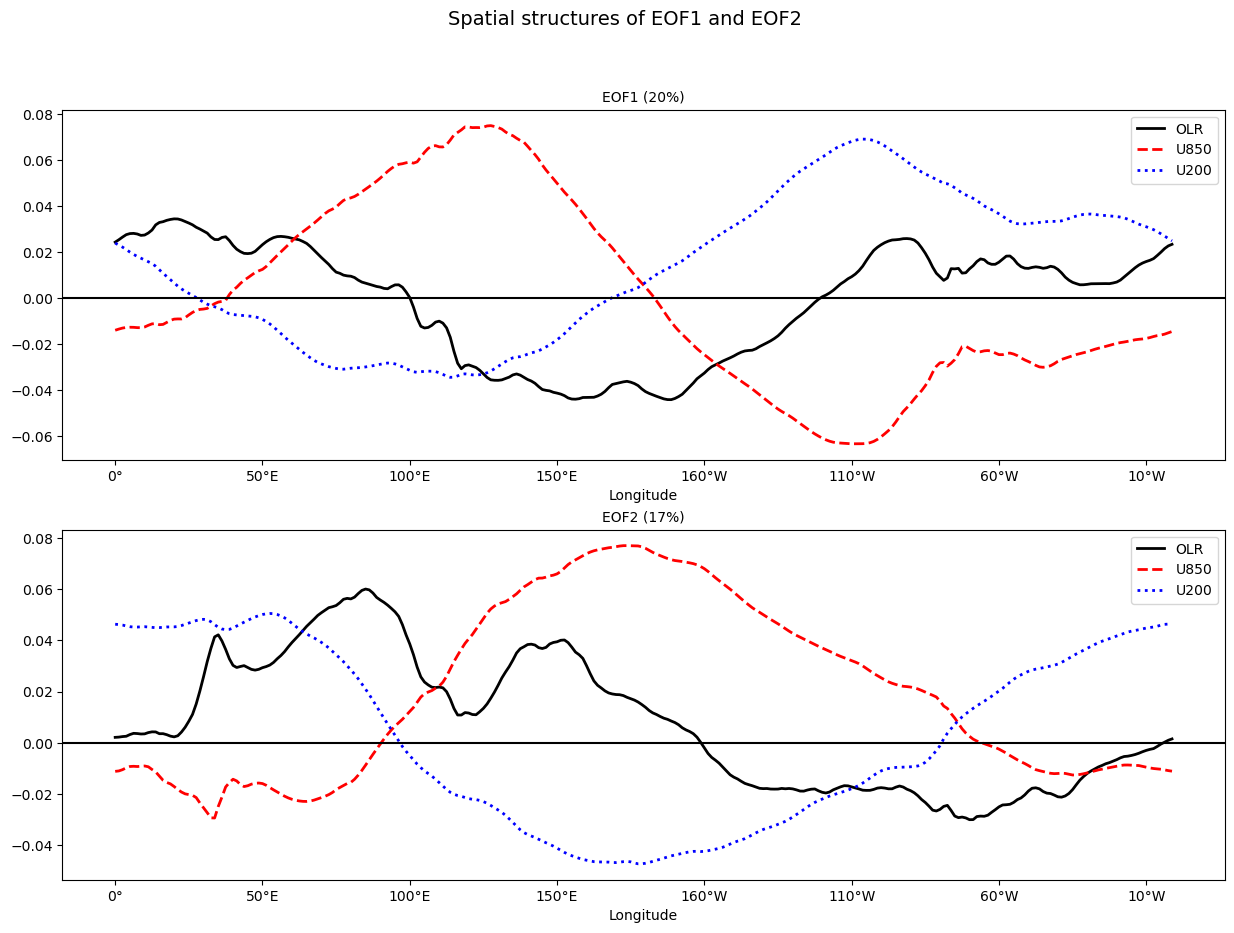

In [26]:
scaling_factors = [0, 1, 1, -1]
if scaling_factors is None:
    print('creating scaling factors')
    scaling_factors = utilities.check_MJO_orientation(eof_list, pcs,  olr['lon'])
utilities.plot_obs_eof(eof_list, pcs, varfrac, olr['lon'],save_Fig_out, scaling_factors)

## Print a Warning Statement

In [27]:
print(f'This may take some patience so be fucking kind for a second; model data doesnt always have the best field representation')
print(f'Therefore it is hard to write heuristics for orienting the EOFS')
print(f'Check that the orientation of the created figure is correct, if it is not, provide your own "scaling factors"')
print(f'check the figure against: https://www.ncl.ucar.edu/Applications/Images/mjoclivar_14_1_lg.png')
print(f'to do so include the flag --scaling_factors [0 , 1, -1, 1], where positions 1 and 2 select for eof number and 3 and 4 are multipliers')
print(f'--scaling_factors options: [[0,1] , [1,0], [-1,1], [-1,1]], where positions 1 and 2 select for eof number and 3 and 4 are multipliers')

This may take some patience so be fucking kind for a second; model data doesnt always have the best field representation
Therefore it is hard to write heuristics for orienting the EOFS
Check that the orientation of the created figure is correct, if it is not, provide your own "scaling factors"
check the figure against: https://www.ncl.ucar.edu/Applications/Images/mjoclivar_14_1_lg.png
to do so include the flag --scaling_factors [0 , 1, -1, 1], where positions 1 and 2 select for eof number and 3 and 4 are multipliers
--scaling_factors options: [[0,1] , [1,0], [-1,1], [-1,1]], where positions 1 and 2 select for eof number and 3 and 4 are multipliers


## Use the scaling factors to then select the PCS for the creation of the modes

In [28]:
dicty = utilities.get_phase_and_eofs(eof_list, pcs, olr['lon'], scaling_factors)
MJO_fobs = utilities.save_out_obs(dicty, u200, u850, olr, save_nc_out)
MJO_fobs

...saved out ...


<xarray.Dataset>
Dimensions:       (time: 4015, lon: 288)
Coordinates:
  * time          (time) object 0001-01-01 12:00:00 ... 0011-12-31 12:00:00
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.3 357.5 358.8
Data variables: (12/13)
    RMM1_obs      (time) float32 0.6013 0.6943 0.7886 ... 0.3878 0.444 0.5162
    RMM2_obs      (time) float32 -0.1371 -0.1045 -0.08005 ... -0.2272 -0.178
    RMMind_obs    (time) float32 0.6167 0.7021 0.7926 ... 0.4807 0.4987 0.546
    RMMphase_obs  (time) float64 0.0 0.0 0.0 0.0 0.0 4.0 ... 0.0 0.0 0.0 0.0 0.0
    olr_norm      (time, lon) float32 0.4603 0.6 0.7274 ... 0.4555 0.462 0.5216
    eof1_olr      (lon) float32 0.02442 0.02547 0.02662 ... 0.02279 0.02347
    ...            ...
    eof1_u850     (lon) float32 -0.01394 -0.01343 -0.01299 ... -0.01506 -0.01449
    eof2_u850     (lon) float32 -0.01114 -0.01097 -0.01047 ... -0.01085 -0.01106
    eof1_u200     (lon) float32 0.024 0.02311 0.02224 ... 0.02601 0.02498
    eof2_u200     (lon) float32 0.04628 0.04616 0.04596 ... 0.04634 0.04634
    u200_norm     (time, lon) float32 1.625 1.587 1.56 ... 1.781 1.721 1.646
    u850_norm     (time, lon) float32 -0.3293 -0.3826 ... -0.1909 -0.1932
Attributes:
    title:        MJO RMM Forecast eof(u850,u200,olr)
    description:  MJO obs in the dataset calculated as in Wheeler and Hendon ...
    author:       S2S_WH_MJO_Forecast_Research_Toolbox
    questions:    wchapman@ucar.edu